In [1]:
from datascience import *
from path_data_variable import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones

Flavor     | Color       | Price
strawberry | pink        | 3.55
chocolate  | light brown | 4.75
chocolate  | dark brown  | 5.25
strawberry | pink        | 5.25
chocolate  | dark brown  | 5.25
bubblegum  | pink        | 4.75

In [3]:
more_cones.group('Flavor')

Flavor     | count
bubblegum  | 1
chocolate  | 3
strawberry | 2

In [4]:
more_cones.group(['Flavor', 'Color'])

Flavor     | Color       | count
bubblegum  | pink        | 1
chocolate  | dark brown  | 2
chocolate  | light brown | 1
strawberry | pink        | 2

In [5]:
more_cones.group(['Flavor', 'Color'], sum)

Flavor     | Color       | Price sum
bubblegum  | pink        | 4.75
chocolate  | dark brown  | 10.5
chocolate  | light brown | 4.75
strawberry | pink        | 8.8

In [6]:
more_cones.group(['Flavor', 'Color'])

Flavor     | Color       | count
bubblegum  | pink        | 1
chocolate  | dark brown  | 2
chocolate  | light brown | 1
strawberry | pink        | 2

In [7]:
more_cones.pivot('Flavor', 'Color')

Color       | bubblegum | chocolate | strawberry
dark brown  | 0         | 2         | 0
light brown | 0         | 1         | 0
pink        | 1         | 0         | 2

In [8]:
more_cones.pivot('Flavor', 'Color', values='Price', collect=sum)

Color       | bubblegum | chocolate | strawberry
dark brown  | 0         | 10.5      | 0
light brown | 0         | 4.75      | 0
pink        | 4.75      | 0         | 8.8

In [9]:
more_cones.group(['Flavor', 'Color'], sum)

Flavor     | Color       | Price sum
bubblegum  | pink        | 4.75
chocolate  | dark brown  | 10.5
chocolate  | light brown | 4.75
strawberry | pink        | 8.8

In [10]:
full_table = Table.read_table(path_data + 'educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17'))
ca_2014

Year        | Age       | Gender | Educational Attainment         | Personal Income     | Population Count
1/1/14 0:00 | 18 to 64  | Female | No high school diploma         | H: 75,000 and over  | 2058
1/1/14 0:00 | 65 to 80+ | Male   | No high school diploma         | H: 75,000 and over  | 2153
1/1/14 0:00 | 65 to 80+ | Female | No high school diploma         | G: 50,000 to 74,999 | 4666
1/1/14 0:00 | 65 to 80+ | Female | High school or equivalent      | H: 75,000 and over  | 7122
1/1/14 0:00 | 65 to 80+ | Female | No high school diploma         | F: 35,000 to 49,999 | 7261
1/1/14 0:00 | 65 to 80+ | Male   | No high school diploma         | G: 50,000 to 74,999 | 8569
1/1/14 0:00 | 18 to 64  | Female | No high school diploma         | G: 50,000 to 74,999 | 14635
1/1/14 0:00 | 65 to 80+ | Male   | No high school diploma         | F: 35,000 to 49,999 | 15212
1/1/14 0:00 | 65 to 80+ | Male   | College, less than 4-yr degree | B: 5,000 to 9,999   | 15423
1/1/14 0:00 | 65 to 80+ | Female | Bachelor's degree or higher    | A: 0 to 4,999       | 15459
... (117 rows omitted)

In [11]:
educ_inc = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
educ_inc

Educational Attainment         | Personal Income     | Population Count
No high school diploma         | H: 75,000 and over  | 2058
No high school diploma         | H: 75,000 and over  | 2153
No high school diploma         | G: 50,000 to 74,999 | 4666
High school or equivalent      | H: 75,000 and over  | 7122
No high school diploma         | F: 35,000 to 49,999 | 7261
No high school diploma         | G: 50,000 to 74,999 | 8569
No high school diploma         | G: 50,000 to 74,999 | 14635
No high school diploma         | F: 35,000 to 49,999 | 15212
College, less than 4-yr degree | B: 5,000 to 9,999   | 15423
Bachelor's degree or higher    | A: 0 to 4,999       | 15459
... (117 rows omitted)

In [12]:
education = educ_inc.select('Educational Attainment', 'Population Count')
educ_totals = education.group('Educational Attainment', sum)
educ_totals

Educational Attainment         | Population Count sum
Bachelor's degree or higher    | 8525698
College, less than 4-yr degree | 7775497
High school or equivalent      | 6294141
No high school diploma         | 4258277

In [13]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

In [14]:
educ_distribution = educ_totals.with_column(
    'Population Percent', percents(educ_totals.column(1))
)
educ_distribution

Educational Attainment         | Population Count sum | Population Percent
Bachelor's degree or higher    | 8525698              | 31.75
College, less than 4-yr degree | 7775497              | 28.96
High school or equivalent      | 6294141              | 23.44
No high school diploma         | 4258277              | 15.86

In [15]:
totals = educ_inc.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)
totals

Personal Income     | Bachelor's degree or higher | College, less than 4-yr degree | High school or equivalent | No high school diploma
A: 0 to 4,999       | 575491                      | 985011                         | 1161873                   | 1204529
B: 5,000 to 9,999   | 326020                      | 810641                         | 626499                    | 597039
C: 10,000 to 14,999 | 452449                      | 798596                         | 692661                    | 664607
D: 15,000 to 24,999 | 773684                      | 1345257                        | 1252377                   | 875498
E: 25,000 to 34,999 | 693884                      | 1091642                        | 929218                    | 464564
F: 35,000 to 49,999 | 1122791                     | 1112421                        | 782804                    | 260579
G: 50,000 to 74,999 | 1594681                     | 883826                         | 525517                    | 132516
H: 75,000 and over  | 2986698                     | 748103                         | 323192                    | 58945

In [16]:
distributions = totals.select(0).with_columns(
    "Bachelor's degree or higher", percents(totals.column(1)),
    'College, less than 4-yr degree', percents(totals.column(2)),
    'High school or equivalent', percents(totals.column(3)),
    'No high school diploma', percents(totals.column(4))   
    )

distributions

Personal Income     | Bachelor's degree or higher | College, less than 4-yr degree | High school or equivalent | No high school diploma
A: 0 to 4,999       | 6.75                        | 12.67                          | 18.46                     | 28.29
B: 5,000 to 9,999   | 3.82                        | 10.43                          | 9.95                      | 14.02
C: 10,000 to 14,999 | 5.31                        | 10.27                          | 11                        | 15.61
D: 15,000 to 24,999 | 9.07                        | 17.3                           | 19.9                      | 20.56
E: 25,000 to 34,999 | 8.14                        | 14.04                          | 14.76                     | 10.91
F: 35,000 to 49,999 | 13.17                       | 14.31                          | 12.44                     | 6.12
G: 50,000 to 74,999 | 18.7                        | 11.37                          | 8.35                      | 3.11
H: 75,000 and over  | 35.03                       | 9.62                           | 5.13                      | 1.38

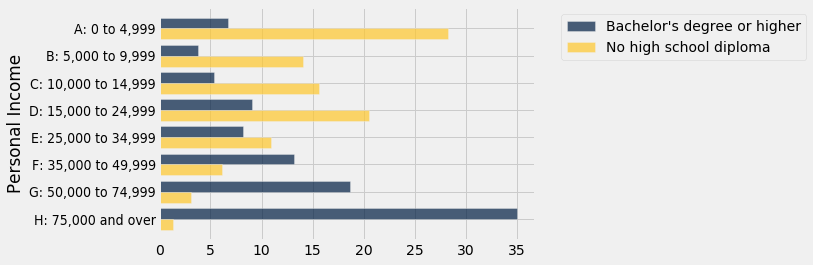

In [17]:
distributions.select(0, 1, 4).barh(0)